<a href="https://colab.research.google.com/github/sjaureguimodo/datascience-digitalhouse/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Analisis exploratorio
  - Ver qué categorías podemos pasar a numericas ordinales (educacion, tarjeta, income category)
  - Correlación para variables numericas
  - Graficos para variables categoricas
  - Pasar la variable target a numerica
  - Metrica de % de attrition
- Limpieza
  - Ver si hay unknowns, qué hacemos en esos casos?
  - Ver si hay clientes duplicados
  - Revisar outliers
- Modelado / Featuring
- Modelo baseline (Bayes)
- Modelo clasificación (regresion logistica?)
- Evaluación e insights (accuracy, matriz de confusion)

- Ver las categoricas
  - Ver si tiene sentido hacer un chi-cuadrado
- Ver las continuas
  - Ver de descartar las que correlacionan mucho entre sí (ver matriz de correlacion)

Buscar métrica a minimizar / maximizar (objetivo de negocio)


Ver qué modelos
- bayes
- knn
- regresion logistica

https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

# Setup

## Library Imports

In [121]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [122]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
#%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


print("Setup Complete")



Setup Complete


## Load data

In [124]:
#Cargar el dataset
df_filepath = '/content/drive/MyDrive/Colab Notebooks/Data Science - Digital House/TP3/BankChurners.csv'
df = pd.read_csv(df_filepath)

#df = pd.read_csv('/content/properatti.csv')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75

df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'nb1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'nb2'}, inplace=True)


df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb1,nb2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [125]:
#Subir desde local
#B_data_filepath = '/content/BankChurners.csv'
#df = pd.read_csv(B_data_filepath)
#pd.set_option('display.max_columns', None)
#pd.options.display.max_colwidth = 75
#df.head(5)


# Analisis exploratorio

In [126]:
# Ver el nombre de las columnas
list(df.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'nb1',
 'nb2']

In [127]:
# Ver la cantidad de filas, columnas, valores no nulos por columna y typo de datos.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Variables Categoricas. Operaciones.

## Duplicados

In [128]:
#AA-Desafio3

#AA D4
df[df.duplicated(keep=False)]


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb1,nb2


No Existen Filas duplicadas

In [129]:
#AA-Desafio3
#CLIENTNUM
df.duplicated(subset=['CLIENTNUM']).unique()


array([False])

No existen CLIENTNUM Duplicados

In [130]:
list(df.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'nb1',
 'nb2']

In [131]:
df.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
nb1                         10127
nb2                         10127
dtype: int64

## Revision Unknowns

In [132]:
###Pero hay Unknowns
df[df == 'Unknown'].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
nb1                            0
nb2                            0
dtype: int64

In [133]:
### Y hay 0s
df[df == 0].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count              904
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon        29
Contacts_Count_12_mon        399
Credit_Limit                   0
Total_Revolving_Bal         2470
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           5
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            7
Avg_Utilization_Ratio       2470
nb1                            0
nb2                            0
dtype: int64

## Distribucion variable target

In [134]:
###Ver la distrbucion de la variable target
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [135]:
###Ver relacion entre target y categoria de ingreso
# Las diferencias parecen mínimas por ingreso aunque los que ganan menos y 
#los que ganan más tienen attrition un poco más alto.
cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])
#cross_tab = cross_tab.reindex(index = ['Less than $40k','$40k - $60k','$60k - $80k', '$80k - $120k', '120k+', 'Unknown'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown,0.168165,0.831835


## Columnas nuevas

In [136]:
#AA-Desafio3
#Agregar columna segun valor de:
#Attrited Customer = 1
#Existing Customer = 0


df['Attrition_Flag_Int'] = df['Attrition_Flag'].apply(lambda x: 1 if x=='Attrited Customer' else 0)


In [137]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb1,nb2,Attrition_Flag_Int
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0


In [138]:
#AA-Desafio3
#Validar total de Flag Original y nuevo Flag Entero Bool

print(df.Attrition_Flag.value_counts())

print(df.Attrition_Flag_Int.value_counts())



Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
0    8500
1    1627
Name: Attrition_Flag_Int, dtype: int64


## Visualización

### Variables categoricas

#### Gender

In [139]:
cross_tab = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'])


cross_tab_prop = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848


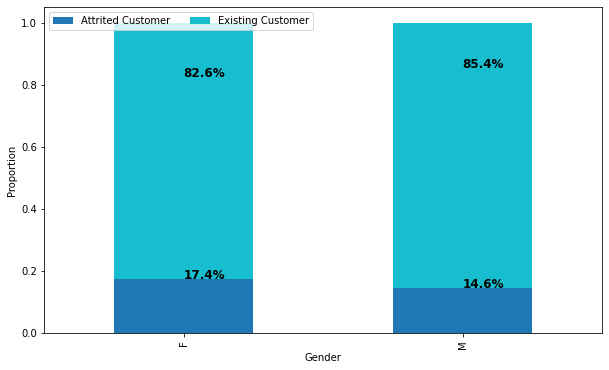

In [140]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


#### Income

In [141]:
cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown,0.168165,0.831835


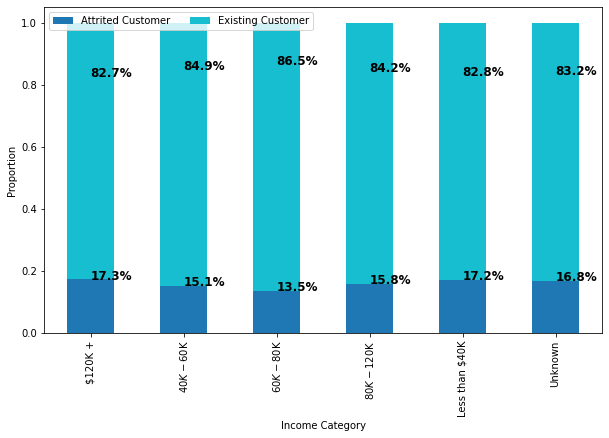

In [142]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Income Category")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


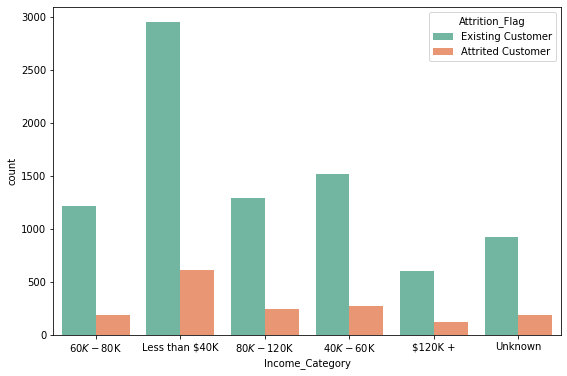

In [143]:
plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set2', data = df)
plt.show()

Las diferencias parecen mínimas por ingreso aunque los que ganan menos y los que ganan más tienen attrition un poco más alto.
Ver si los unknowns tiene sentido encodearlos o directamente filtrar esos valores.
Ver si lo podemos cruzar con el color de la tarjeta

#### Marital_Status

In [144]:
cross_tab = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,0.161765,0.838235
Married,0.151269,0.848731
Single,0.169414,0.830586
Unknown,0.172230,0.827770


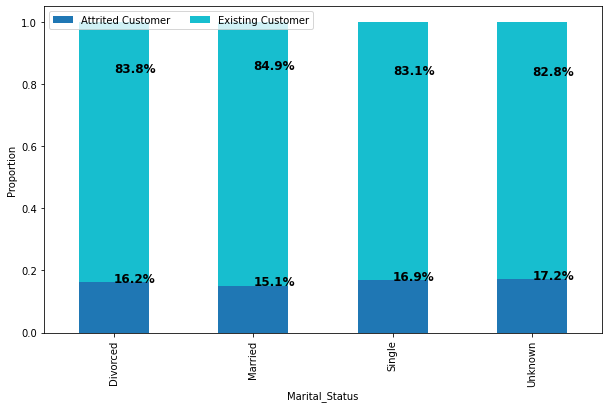

In [145]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Marital_Status")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


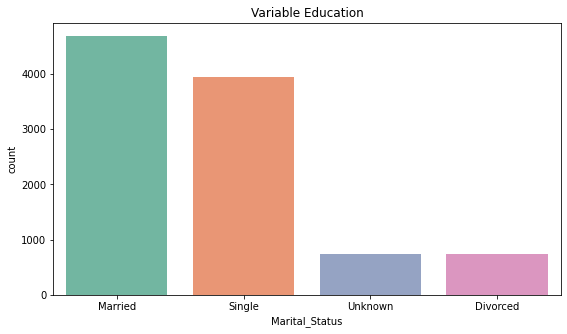

In [146]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)
plt.show()

#### Card_Category

In [147]:
cross_tab = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,0.160979,0.839021
Gold,0.181034,0.818966
Platinum,0.250000,0.750000
Silver,0.147748,0.852252


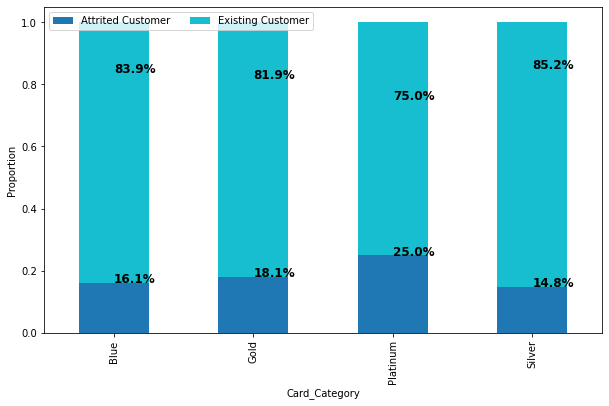

In [148]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Card_Category")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


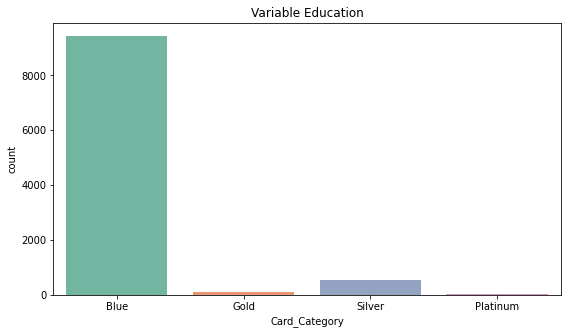

In [149]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Card_Category', palette = 'Set2', data = df)
plt.show()

Vemos una diferencia en el % de platinum, pero no sabemos si es por que tiene un n muy chico

#### Education level

In [150]:
cross_tab = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,0.152024,0.847976
Doctorate,0.210643,0.789357
Graduate,0.155691,0.844309
High School,0.152012,0.847988
Post-Graduate,0.178295,0.821705
Uneducated,0.159381,0.840619
Unknown,0.168532,0.831468


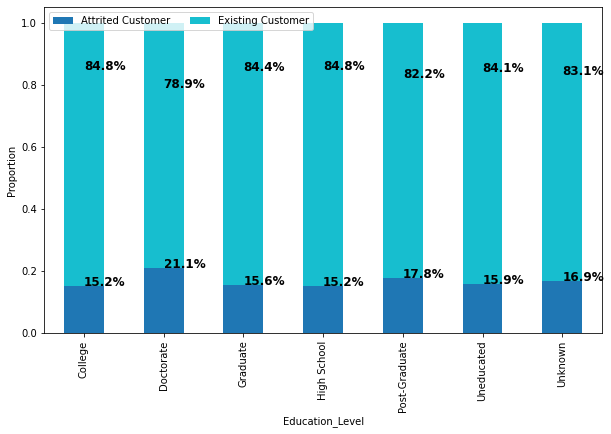

In [151]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Education_Level")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


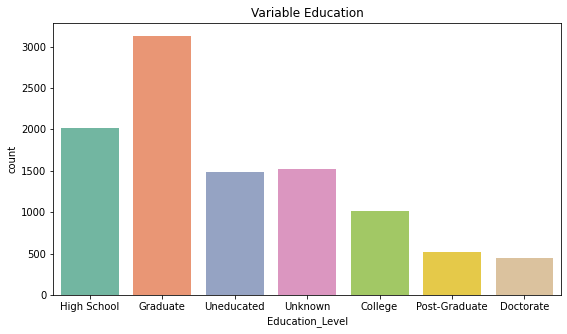

In [152]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education_Level', palette = 'Set2', data = df)
plt.show()

### Variables continuas

#### Matriz de correlacion

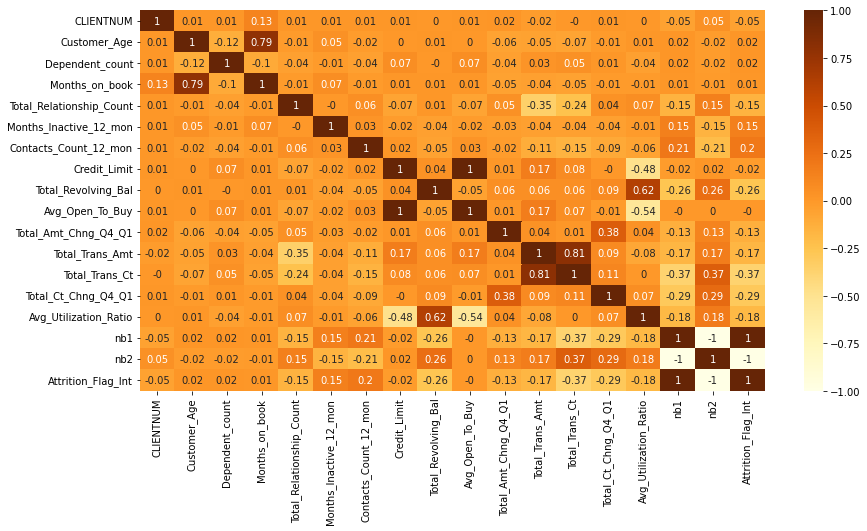

In [153]:
#AA-Desafio3
#Correlacion con Attrition_Flag_Int
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

- Vemos correlación entre la variable Revolving_balance y avg_utilization ratio. Creemos que esto es porque cuanto más usás la tarjeta, mayor es tu saldo deudor.
- Lo mismo pasa con monto y cantidad de TRX

#### Box plot edad

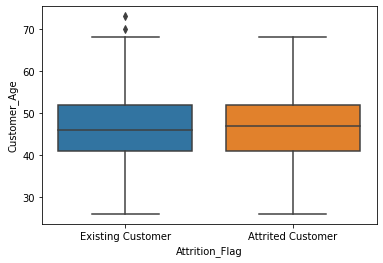

In [154]:
#Box plot attrition edad
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)

No vemos diferencia entre los 2 grupos

#### Box plot dependent count

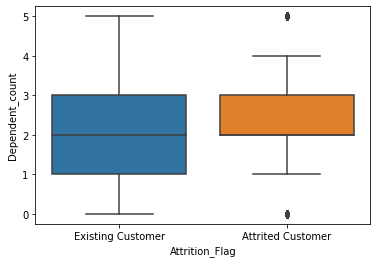

In [155]:
#Box plot attrition dependent_count
sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df)

Vemos bien sumarla al modelo

#### Box plot months on book

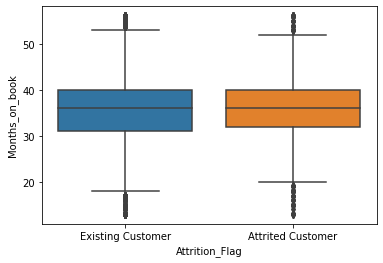

In [156]:
#Box plot attrition antiguedad
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df)

No vemos diferencia entre los grupos

#### Box plot Total_Relationship_Count

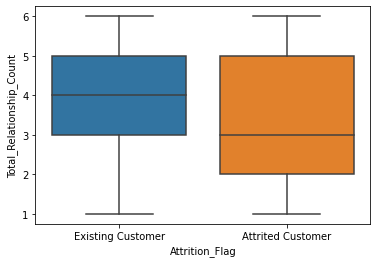

In [157]:
#Box plot attrition relationship count
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)

Vemos una diferencia entre los grupos, podríamos usarlo como variable predictora

#### Boxplot Months_Inactive_12_mon

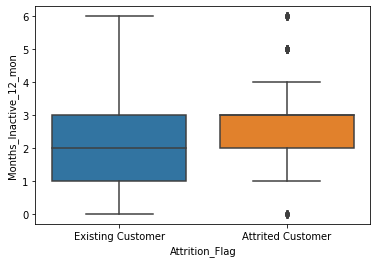

In [158]:
#Box plot attrition antiguedad
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df)

Vemos una diferencia entre los grupos, podríamos usarlo como variable predictora

#### Boxplot Contacts_Count_12_mon

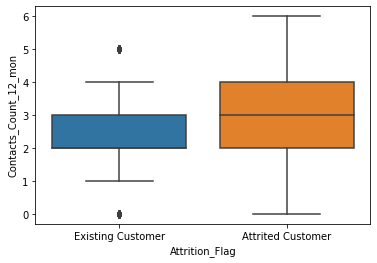

In [159]:
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df)

Vemos una diferencia entre los grupos, podríamos usarlo como variable predictora

#### Boxplot Credit_Limit

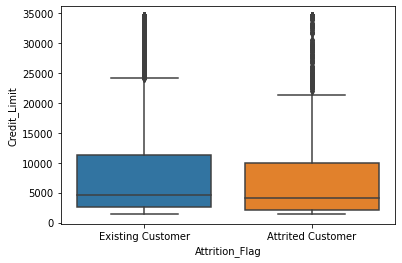

In [160]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)

Vemos una diferencia chica en los grupos, podría llegar a usarse como variable predictora




#### Boxplot Total_Revolving_Bal

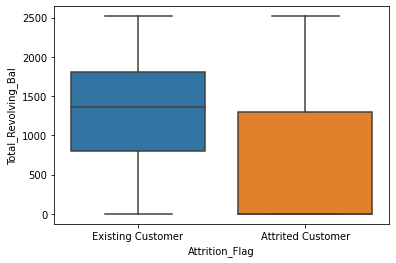

In [161]:
### Attrition y saldo deudor. Los que abandonan tienen menos saldo deudor.
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df)

Vemos una diferencia clara en los grupos y creemos que suma valor al modelo como variable predictora

#### Boxplot Avg_Open_To_Buy

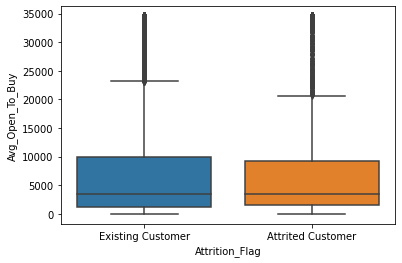

In [162]:
## Attrition y monto disponible
sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df)

No vemos mucha diferencia, más que "Existing customer" tiene más variabilidad que "Attrited customer"

#### Boxplot Total_Amt_Chng_Q4_Q1

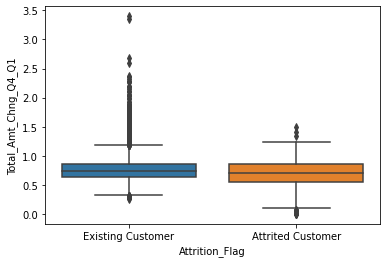

In [163]:
sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df)

No vemos valor en sumarla al modelo

#### Boxplot Total_Trans_Amt

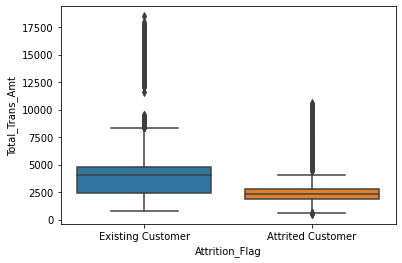

In [164]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)

Vemos una diferencia clara en los grupos y creemos que suma valor agregarla al modelo

#### Boxplot Total_Trans_Ct

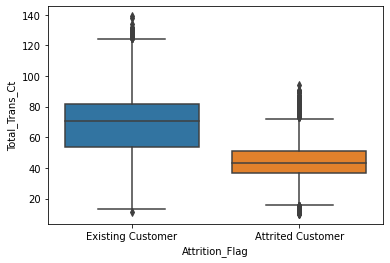

In [165]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)

Vemos la misma diferencia, pero como una es cantidad de TRX y la otra monto deberíamos elegir solo una (por estar correlacionadas).
Vamos con count que es la que mayor diferencia presenta en los grupos

#### Boxplot Total_Ct_Chng_Q4_Q1

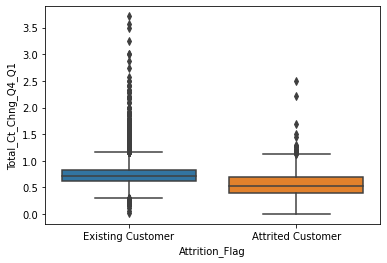

In [166]:
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df)


Preferimos no sumarla al modelo por explicabilidad

#### Boxplot Avg_Utilization_Ratio

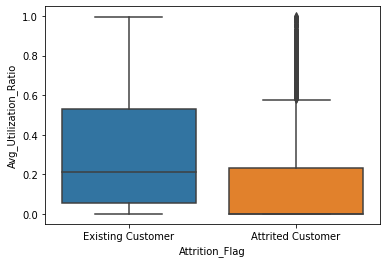

In [167]:
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df)

Vemos una diferencia en los grupos y creemos que puede sumar valor al modelo

In [168]:
#Graficos para variables categoricas

#Income_Category
#Gender
#Education_Level
#Marital_Status
#Card_Category

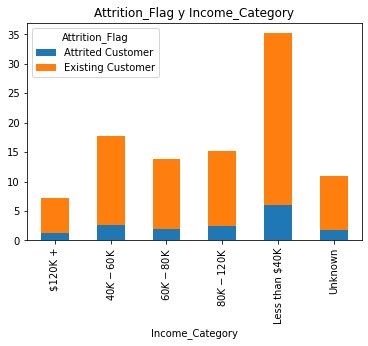

In [169]:
#AA-Desafio3

F=df.groupby(['Income_Category','Attrition_Flag']).size()
TotalF = F.sum()

Flag =(F.loc[:]*100)/TotalF
Flag

#Se resetea los indices
Flag = Flag.reset_index()

#Se ordena por Totales
Flag2 = Flag.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag2

#Grafico
Flag2 = pd.pivot_table(Flag2, columns = 'Attrition_Flag', index = 'Income_Category', values = 0)

Flag2.plot(kind = 'bar', stacked = True,  title='Attrition_Flag y Income_Category')



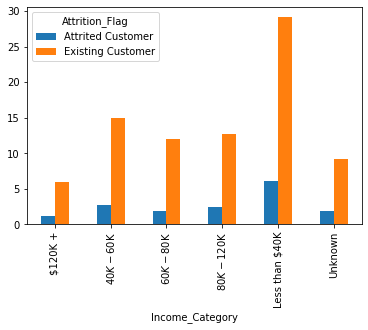

In [170]:
Flag2.plot(kind = 'bar')

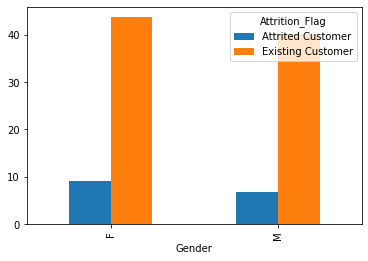

In [171]:
#AA-Desafio3

F_G=df.groupby(['Gender','Attrition_Flag']).size()
TotalG = F_G.sum()

Flag_G =(F_G.loc[:]*100)/TotalG
Flag_G


#Se resetea los indices
Flag_Gender = Flag_G.reset_index()

#Se ordena por Totales
Flag_Gender2 = Flag_Gender.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_Gender2

#Grafico
Flag_Gender2 = pd.pivot_table(Flag_Gender2, columns = 'Attrition_Flag', index = 'Gender', values = 0)
Flag_Gender2.plot(kind = 'bar')


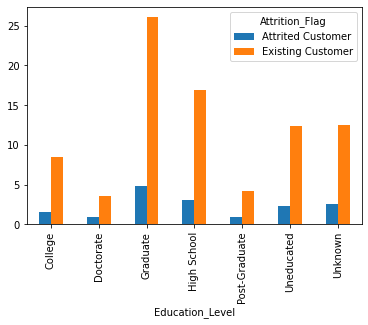

In [172]:
#AA-Desafio3
#Education_Level

F_EL=df.groupby(['Education_Level','Attrition_Flag']).size()
TotalE = F_EL.sum()

Flag_EL =(F_EL.loc[:]*100)/TotalE
Flag_EL


#Se resetea los indices
Flag_Educ = Flag_EL.reset_index()

#Se ordena por Totales
Flag_Educ2 = Flag_Educ.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_Educ2

#Grafico
Flag_Educ2 = pd.pivot_table(Flag_Educ2, columns = 'Attrition_Flag', index = 'Education_Level', values = 0)
Flag_Educ2.plot(kind = 'bar')

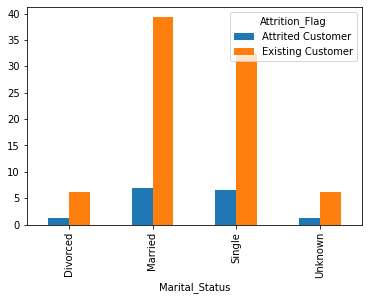

In [173]:
#AA-Desafio3
#Marital_Status

F_MS=df.groupby(['Marital_Status','Attrition_Flag']).size()
TotalMS = F_MS.sum()

F_MS =(F_MS.loc[:]*100)/TotalMS
F_MS


#Se resetea los indices
Flag_MS = F_MS.reset_index()

#Se ordena por Totales
Flag_MS2 = Flag_MS.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_MS2


#Grafico
Flag_MS2 = pd.pivot_table(Flag_MS2, columns = 'Attrition_Flag', index = 'Marital_Status', values = 0)
Flag_MS2.plot(kind = 'bar')

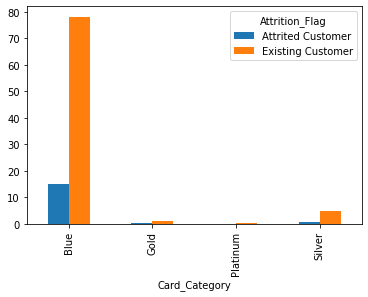

In [174]:
#AA-Desafio3
#Card_Category

F_CC=df.groupby(['Card_Category','Attrition_Flag']).size()
TotalCC = F_CC.sum()

Flag_CC =(F_CC.loc[:]*100)/TotalCC
Flag_CC


#Se resetea los indices
Flag_Card = Flag_CC.reset_index()

#Se ordena por Totales
Flag_Card2 = Flag_Card.sort_values([0], ascending=False)

#Se valida Orden de Totales
Flag_Card2

#Grafico
Flag_Card2 = pd.pivot_table(Flag_Card2, columns = 'Attrition_Flag', index = 'Card_Category', values = 0)
Flag_Card2.plot(kind = 'bar')

# Seleccionar variables

## Numericas

- Dependent_count
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Total_Revolving_Bal
- Total_Trans_Ct
- Avg_Utilization_Ratio

## Categoricas

- Gender
- Income_Category
- Card_Category
- Education_Level

# Armar los modelos


## KNN

In [175]:
from sklearn.datasets import make_classification

# Generamos un dataset de 500 samples, cada una con 2 features, correspondientes a 2 clases distintas
X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=123)


In [176]:
#Volcamos los datos a un DataFrame
dfKnn = pd.DataFrame(X, columns=['Total_Trans_Ct', 'Income_Category'])
dfKnn['Attrition_Flag_Int'] = y
dfKnn.head()

,Total_Trans_Ct,Income_Category,Attrition_Flag_Int
0,2.041544,2.238941,0
1,-0.454790,-1.732074,1
2,-1.446123,-0.775002,1
3,0.012093,-1.863394,1
4,-0.601190,-1.412637,1


In [177]:
# Inspeccionamos el vector objetivo
dfKnn['Attrition_Flag_Int'].unique()

array([0, 1])

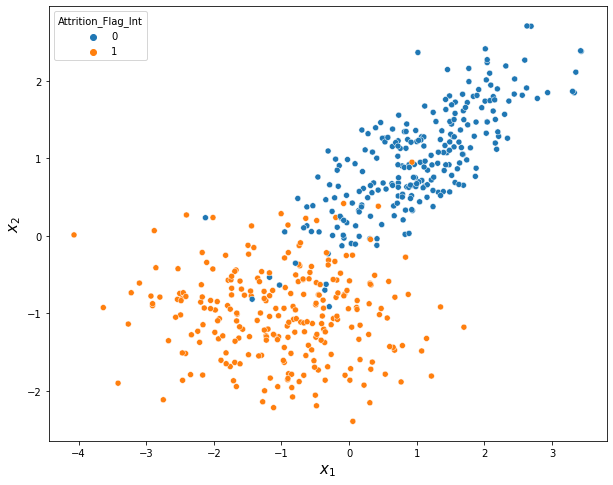

In [178]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total_Trans_Ct', y='Income_Category', data=dfKnn, hue='Attrition_Flag_Int')
plt.xlabel(f'$x_1$', fontsize=15)
plt.ylabel(f'$x_2$', fontsize=15);

In [179]:
dfKnn.groupby('Attrition_Flag_Int')['Income_Category'].mean()


Attrition_Flag_Int
0    0.975648
1   -1.009350
Name: Income_Category, dtype: float64

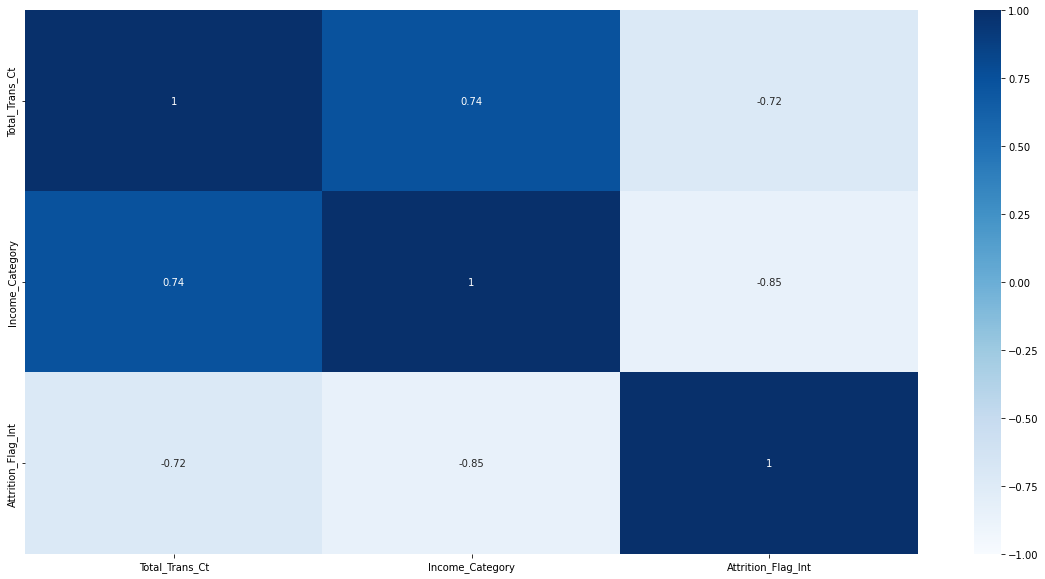

In [180]:

plt.figure(figsize=(20,10))
sns.heatmap(dfKnn.corr(), annot=True, vmin=-1, cmap='Blues');


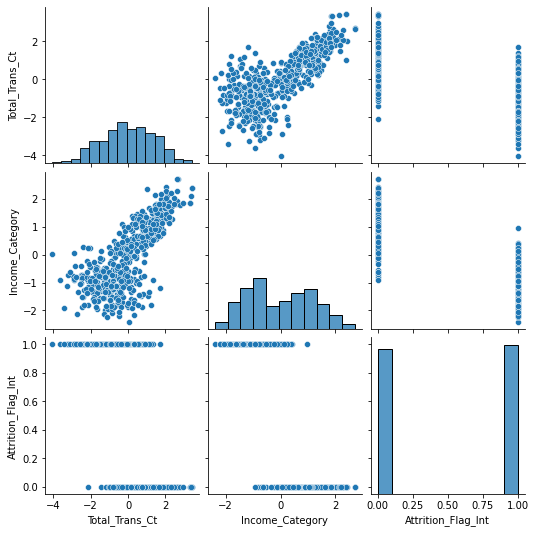

In [181]:
sns.pairplot(dfKnn);

In [182]:
# Construir la variable target: Attrition_Flag_Int
y = dfKnn['Attrition_Flag_Int']
y.head()


0    0
1    1
2    1
3    1
4    1
Name: Attrition_Flag_Int, dtype: int64

In [183]:
# Separar los conjuntos de entrenamiento y testeo, estratificando por clase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [184]:
# Estandarización de variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [185]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [186]:
def scores_knn(X, y, start,stop,step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores


In [187]:
# Probamos de 1 a 20 vecinos
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

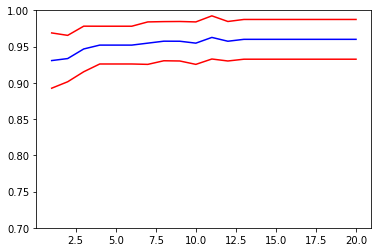

In [188]:
# Visualizamos los resultados

plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.7, 1);

In [189]:
#Prediccion en Test
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]


,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
10,0.96266,0.029771,11,0.932889,0.992431


In [190]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

11

In [191]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [192]:
from sklearn.metrics import accuracy_score

# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train))

0.9573333333333334

In [193]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test)


In [194]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred)


0.96

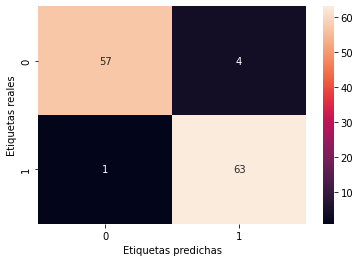

In [195]:
from sklearn.metrics import confusion_matrix

# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Regresion logistica

### Preparacion del modelo

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Numericas

In [306]:
numericals = ['Dependent_count',
'Total_Relationship_Count',
'Months_Inactive_12_mon',
'Contacts_Count_12_mon',
'Credit_Limit',
'Total_Revolving_Bal',
'Total_Trans_Ct',
'Avg_Utilization_Ratio']

X = df[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Credit_Limit_std,Total_Revolving_Bal_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std
0,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,-0.973895,-0.775882
1,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-1.357340,-0.616276
2,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-1.911206,-0.997155
3,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-1.911206,1.759686
4,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-1.570365,-0.997155
...,...,...,...,...,...,...,...,...
10122,-0.266547,-0.522785,-0.337598,0.492404,-0.509330,0.844455,2.221481,0.678714
10123,-0.266547,0.120579,-0.337598,0.492404,-0.479181,1.255524,0.176440,0.856458
10124,-1.036462,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.207005,-0.997155
10125,-0.266547,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.121795,-0.997155


#### Categoricas

##### Encoding ordinal

In [307]:
Income_Category_enc = df['Income_Category']
Income_Category_enc.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [308]:
#Mapeamos los unknown a 1, 40-60k, que es el valor mas repetido
Income_Category_enc = Income_Category_enc.map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60K':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4, 
                                                '$120K +':5})

In [309]:
Card_Category_enc = df['Card_Category']
Card_Category_enc.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [310]:
Card_Category_enc = Card_Category_enc.map({'Blue':0,
                                          'Silver':1,
                                          'Gold':2,
                                          'Platinum':3})

In [311]:
Education_Level_enc = df['Education_Level']
Education_Level_enc.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [312]:
# Mapeamos los unknown a College, que es el valor mas repetido
Education_Level_enc = Education_Level_enc.map({'Unknown':4,
                                              'Uneducated':1,
                                              'High School':2, 
                                              'College':3,
                                              'Graduate':4,  
                                              'Post-Graduate':5,
                                              'Doctorate':6})

##### Onehot encoder

In [313]:
categoricals = ['Gender']

enc = OneHotEncoder(drop='first')
X = df[categoricals]
enc.fit(X)
enc.categories_

[array(['F', 'M'], dtype=object)]

In [314]:
dummies = enc.transform(X).toarray()
dummies

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [315]:
dummies.shape

(10127, 1)

In [316]:
dummies_df = pd.DataFrame(dummies)
dummies_df

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


In [317]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

[array(['Gender_F', 'Gender_M'], dtype=object)]

In [318]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['Gender_M']

In [319]:
dummies_df.columns = col_names_drop_first
dummies_df

,Gender_M
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


#### Concatenar resultados

In [320]:
df_prep = pd.concat([dummies_df,
                     std_df,
                     Income_Category_enc,
                     Card_Category_enc,
                     Education_Level_enc
                     ], axis = 1)
df_prep

,Gender_M,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Credit_Limit_std,Total_Revolving_Bal_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category,Card_Category,Education_Level
0,1.0,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,-0.973895,-0.775882,3,0,2
1,0.0,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-1.357340,-0.616276,1,0,4
2,1.0,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-1.911206,-0.997155,4,0,4
3,0.0,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-1.911206,1.759686,1,0,2
4,1.0,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-1.570365,-0.997155,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,-0.266547,-0.522785,-0.337598,0.492404,-0.509330,0.844455,2.221481,0.678714,2,0,4
10123,1.0,-0.266547,0.120579,-0.337598,0.492404,-0.479181,1.255524,0.176440,0.856458,2,0,4
10124,0.0,-1.036462,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.207005,-0.997155,1,0,2
10125,1.0,-0.266547,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.121795,-0.997155,2,0,4


### Entrenamiento

In [321]:
X = df_prep
y = df.Attrition_Flag

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

In [323]:
#data.default.value_counts()['1'] / data.shape[0]

In [324]:
#y_train.value_counts()['Yes'] / y_train.shape[0]

In [325]:
#y_test.value_counts()['Yes'] / y_test.shape[0]

In [326]:
logistic_regression = LogisticRegression(penalty='none') 
logistic_regression.fit(X_train, y_train);

In [327]:
y_test_pred = logistic_regression.predict(X_test)
y_test_pred

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Attrited Customer'],
      dtype=object)

In [328]:
y_test_pred_proba = logistic_regression.predict_proba(X_test)
y_test_pred_proba

array([[1.89462244e-01, 8.10537756e-01],
       [1.11091894e-02, 9.88890811e-01],
       [9.24448582e-04, 9.99075551e-01],
       ...,
       [5.55038348e-03, 9.94449617e-01],
       [7.08177598e-03, 9.92918224e-01],
       [7.21099404e-01, 2.78900596e-01]])

In [329]:
accuracy_score(y_test, y_test_pred)

0.8882306477093207

In [330]:
confusion_matrix(y_test, y_test_pred)

array([[ 200,  207],
       [  76, 2049]])

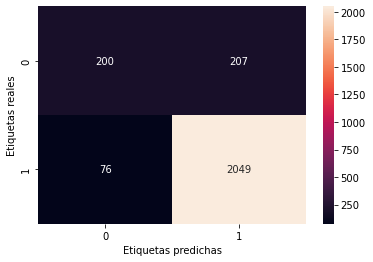

In [332]:
# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

# Seleccion, conclusiones etc